# Sample

This sample shows how the lightroot project works. Note important settings are confined to a settings file so that we try
to make the slow batch jobs parameterless. The method names should be self-explantory - we sharpen images, pluck centroids and show a sample of the overlay. This process is carried out in batch to create a dataframe of blobs which is saved to txt files in the cached data folder. Having extracted centroids for all frames, the tracker builds the identities and writes the result to the cached data folder

In [1]:
%matplotlib inline
import lightroot

11/06/2018 17:14:41 INFO:loaded lightroot


# 1 Manually set file templates for processing

In [2]:
pth  ="C:/Users/mrsir/Box Sync/CYCB-GFP/uncut/Raw Data/083117/147/"
pth  ="C:/Users/mrsir/Box Sync/CYCB-GFP/cut/April 4 (cut run 192)/"

lightroot.SETTINGS["stack_files"] = pth+"Run0192_tp{:0>3}.tif"
lightroot.SETTINGS["maxint_files"] = pth+"Run0192_tp{}_MIP.tif"

# 2 Loading frames

In [3]:
# sample_time_frame =15
# stack = lightroot.io.get_stack(sample_time_frame)
# lightroot.io.plotimg(stack)

# 3 Full frame detection routine

In [4]:
# id_ = 380
# stack = lightroot.io.get_stack(id_)
# out = []
# blob_centroids,stack = lightroot.blobs.detect(stack,  display_detections=False,  overlay_original_id=id_,out=out) #sharpen_iter=2, isolate_iter=2,
# lightroot.io.overlay_blobs(stack,blob_centroids,out)

# 4 Running batch process

In [5]:
#lightroot.process("C:/Users/mrsir/Box Sync/uncut/images/083117/149/", log_to_file=False)

# 5 Low-level steps

## isolating roots via lowband

### 2d

11/06/2018 17:14:45 INFO(0):Stack loaded from C:/Users/mrsir/Box Sync/CYCB-GFP/cut/April 4 (cut run 192)/Run0192_tp000.tif
11/06/2018 17:14:51 INFO(0):estimated gaussian noise standard deviation = 0.022136037181845862
11/06/2018 17:15:04 INFO(0):using low band range for 2d data from 95,99, 50 data percentile [0.292, 0.512, 0.2]
11/06/2018 17:15:04 INFO(0):projecting 2d mask to 3d mask...
11/06/2018 17:15:06 INFO(0):setting the clipped region adaptive threshold to 0.18 based on maximum label perimeters


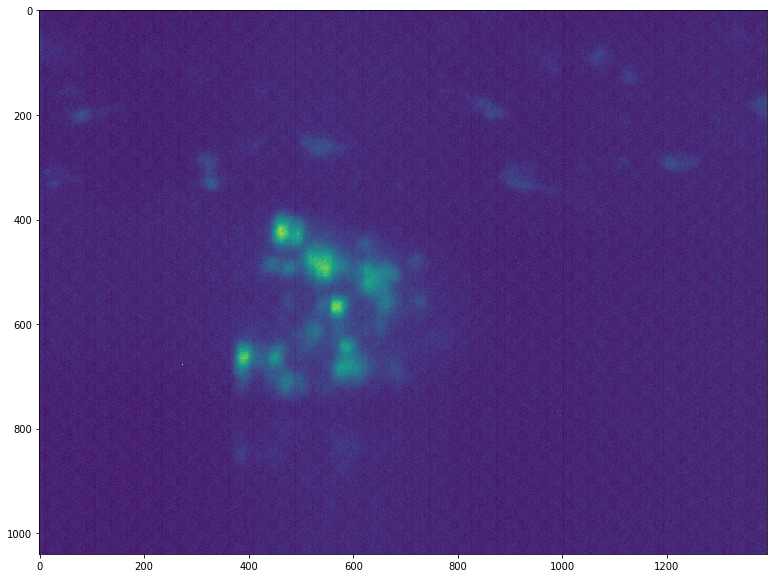

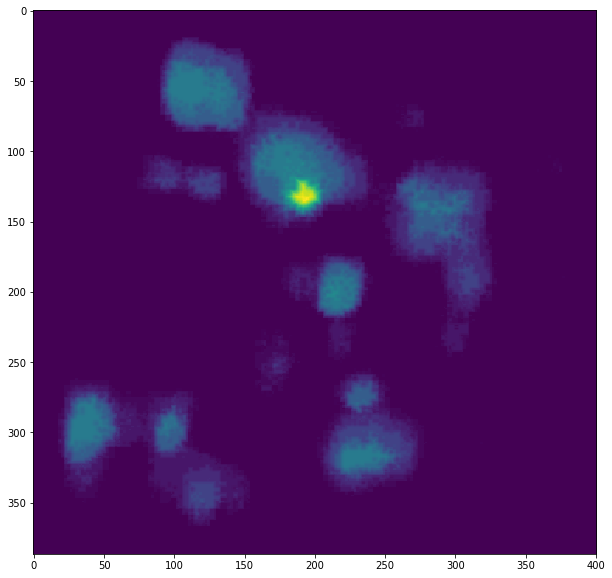

In [6]:
stack = lightroot.io.get_stack(0)

#im = stack.copy()
#stack = lightroot.blobs.denoise(stack)
#stack /= stack.max()
lightroot.io.plotimg(stack)
stack = lightroot.blobs.low_pass_2d_proj_root_segmentation(stack,return_early=True,denoise_img=False)
lightroot.io.plotimg(stack)

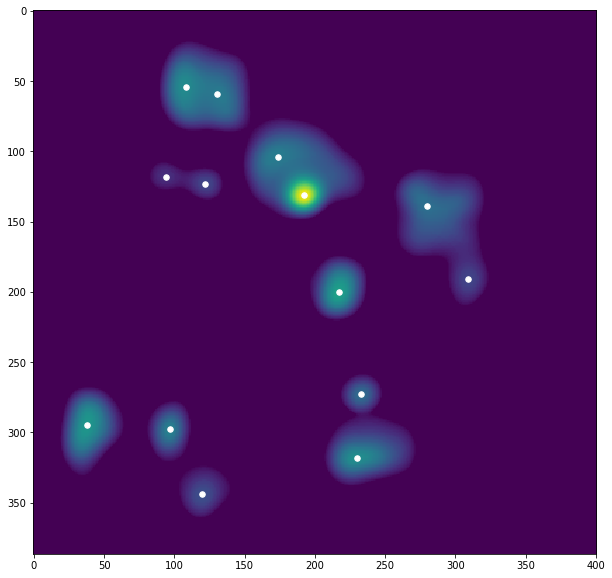

In [7]:
g2 = stack.copy()
g2, blobs = lightroot.blobs.simple_detector(g2)
lightroot.io.overlay_blobs(g2,blobs)

### 3d

In [ ]:
# stack= lightroot.blobs.low_pass_root_segmentation(stack)
# lightroot.io.plotimg(stack_sample)

## sharpening root region

In [ ]:
stack = lightroot.blobs.sharpen(stack, iterations=1)
lightroot.io.plotimg(stack)

## isolating blobs in data

In [ ]:
stack = lightroot.blobs.isolate(stack)
ax = lightroot.io.plotimg(stack)

In [ ]:
from scipy import ndimage as ndi
import matplotlib.pyplot as plt
from skimage.feature import peak_local_max
from skimage import data, img_as_float
# display results
import pandas as pd
im = stack.copy()


def peak_centroids(im, size=10, min_distance=10):
    image_max = ndi.maximum_filter(im, size=size, mode='constant')
    coordinates = peak_local_max(im, min_distance=min_distance)
    return pd.DataFrame(coordinates,columns=["z", "y", "x"])

blob_centroids = peak_centroids(im)
lightroot.io.overlay_blobs(stack,blobs_centroids)

## marking centroids

In [ ]:

blobs_centroids = lightroot.blobs.blob_centroids(stack, display=True, max_final_ecc=0.95,min_final_volume=1000, underlying_image=stack)
lightroot.io.overlay_blobs(stack,blobs_centroids)

In [ ]:
#https://homepages.inf.ed.ac.uk/rbf/HIPR2/fourier.htm